# Flight Prediction 



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline                
# ^ It will show the diagram or figure as we'll create it, doesn't requires fig.show() to show diagram

C:\Users\mayank\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
final_df=df_train.append(df_test)
final_df.head()

C:\Users\mayank\AppData\Local\Temp\ipykernel_6300\3989840536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=df_train.append(df_test)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [9]:
final_df.info()    # derive some features from Date_of_journey

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [10]:
final_df['Date_of_Journey'].str.split('/').str[0]   # spliting the date (string) by / 

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [11]:
final_df['Day']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df.head()

#df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])          #efficient coding
# Can use lamda function 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [64]:
visual=pd.read_excel('Data_Train.xlsx')

In [74]:
print("DF_TRAIN: ",X.columns)
print("visual :",visual.columns)

DF_TRAIN:  Index(['Total_Stops', 'Day', 'Month', 'Year', 'Arrival_hour', 'Arrival_min',
       'dep_hour', 'dep_min', 'duration_hours', 'Airline_1', 'Airline_2',
       'Airline_3', 'Airline_4', 'Airline_5', 'Airline_6', 'Airline_7',
       'Airline_8', 'Airline_9', 'Airline_10', 'Airline_11', 'Source_1',
       'Source_2', 'Source_3', 'Source_4', 'Destination_1', 'Destination_2',
       'Destination_3', 'Destination_4', 'Destination_5', 'Additional_Info_1',
       'Additional_Info_2', 'Additional_Info_3', 'Additional_Info_4',
       'Additional_Info_5', 'Additional_Info_6', 'Additional_Info_7',
       'Additional_Info_8', 'Additional_Info_9'],
      dtype='object')
visual : Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [75]:
X

,Total_Stops,Day,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min,duration_hours,Airline_1,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,24,3,2019,1,1,22,20,2,0,...,1,0,0,0,0,0,0,0,1,0
1,2.0,1,5,2019,13,13,5,50,7,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,9,6,2019,4,4,9,25,19,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,12,5,2019,23,23,18,5,5,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1,3,2019,21,21,16,50,4,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,9,4,2019,22,22,19,55,2,0,...,0,0,0,0,0,0,0,0,1,0
10679,0.0,27,4,2019,23,23,20,45,2,1,...,0,0,0,0,0,0,0,0,1,0
10680,0.0,27,4,2019,11,11,8,20,3,0,...,0,0,0,0,0,0,0,0,1,0
10681,0.0,1,3,2019,14,14,11,30,2,0,...,1,0,0,0,0,0,0,0,1,0


In [66]:
visual['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [65]:
visual['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [72]:
visual['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [12]:
# Converting those feature dtype into int

final_df['Day']=final_df['Day'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [14]:
final_df.drop('Date_of_Journey',axis=1, inplace=True)

In [15]:
final_df['Arrival_Time'].str.split(' ')


0       [01:10, 22, Mar]
1                [13:15]
2       [04:25, 10, Jun]
3                [23:30]
4                [21:35]
              ...       
2666    [20:25, 07, Jun]
2667             [16:55]
2668    [04:25, 07, Mar]
2669             [19:15]
2670             [19:15]
Name: Arrival_Time, Length: 13354, dtype: object

In [16]:
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [17]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]


In [19]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_hour'].astype(int)

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Day              13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [21]:
final_df.drop('Arrival_Time',inplace=True,axis=1)

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Day              13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


In [23]:
final_df['dep_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['dep_min']=final_df['Dep_Time'].str.split(':').str[1]


In [24]:
final_df['dep_hour']=final_df['dep_hour'].astype(int)
final_df['dep_min']=final_df['dep_min'].astype(int)

In [25]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [26]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,9,9,45


In [27]:
final_df['Total_Stops'].unique()  #1 nan value

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [29]:
final_df.drop('Route',axis=1,inplace=True)

In [30]:
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,1,22,20


In [31]:
final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]


0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration, Length: 13354, dtype: object

In [32]:
final_df['duration_hours']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df['duration_minutes']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]



In [33]:
final_df[final_df['duration_hours'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min,duration_hours,duration_minutes
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,16,16,50,5m,NaN
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,16,16,50,5m,NaN


In [34]:
final_df.drop('duration_minutes',inplace=True,axis=1)
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)
final_df['duration_hours']=final_df['duration_hours'].astype(int)


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Day              13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  dep_hour         13351 non-null  int32  
 13  dep_min          13351 non-null  int32  
 14  duration_hours   13351 non-null  int32  
dtypes: float64(2), int32(8), object(5)
memory usage: 1.2+ MB


In [36]:
final_df.drop('Duration',axis=1,inplace=True)

In [37]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [39]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [40]:
final_df.shape

(13351, 14)

In [41]:
final_df.head(3)   
## can also use oneHotEncoder same as this
## final_df['Airline']=oneHotEncoder.fit_transform(final_df['Airline'])

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min,duration_hours
0,3,0,5,0.0,8,3897.0,24,3,2019,1,1,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,13,5,50,7
2,4,2,1,2.0,8,13882.0,9,6,2019,4,4,9,25,19


In [42]:
final_df=pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

In [43]:
final_df.shape
final_df.head()
for i in final_df.columns:
    if i=='Price':
        continue
    if final_df[i].isnull().sum()>0:
        print(i,":",final_df[i].isnull().sum())

final_df.drop(9039,axis=0,inplace=True)
final_df[final_df['Total_Stops'].isnull()]

Total_Stops : 1


,Total_Stops,Price,Day,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min,duration_hours,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9


In [44]:
df_train=final_df[~final_df['Price'].isnull()]
df_test=final_df[final_df['Price'].isnull()]
# for i in df_train.columns:
#     if df[i].isnull().sum()>0:
#         df[i]=np.where(df[i].isnull(),df[i].mode(),df[i])


# for i in df.columns:
#     print(df[i].isnull().sum(),":",i)

In [45]:
df_train.head()

,Total_Stops,Price,Day,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min,duration_hours,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,1,22,20,2,...,1,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,5,2019,13,13,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9,6,2019,4,4,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12,5,2019,23,23,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,3,2019,21,21,16,50,4,...,1,0,0,0,0,0,0,0,1,0


In [46]:
X=df_train.drop('Price',axis=1)
y=df_train['Price']

In [47]:
from sklearn.ensemble import RandomForestRegressor      #IN  RandomForest doesn't require Standard scaling  but ANN and regression require it
Rf=RandomForestRegressor()


In [48]:
## Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=33)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
y_train

2701     13067.0
1632     14237.0
2873      8085.0
8445     10844.0
10595     6628.0
          ...   
57        7414.0
578      14714.0
5849     12395.0
2439     12537.0
7190      3807.0
Name: Price, Length: 8544, dtype: float64

In [51]:
Rf=RandomForestRegressor(n_estimators=100,criterion='squared_error',min_samples_split=2,min_samples_leaf=1).fit(X_train,y_train)

ans=Rf.predict(X_test)

In [52]:
ans

array([16366.48 ,  4235.57 ,  8969.665, ...,  4089.59 , 12373.   ,
        4867.   ])

In [53]:
#from sklearn import metrices
# Calculate the absolute errors
errors = abs(ans - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 662.71 degrees.


In [54]:
from sklearn.metrics import r2_score
print('Accuracy:',round(r2_score(ans,y_test)*100,3),'%')

Accuracy: 89.89 %


c:\Users\mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


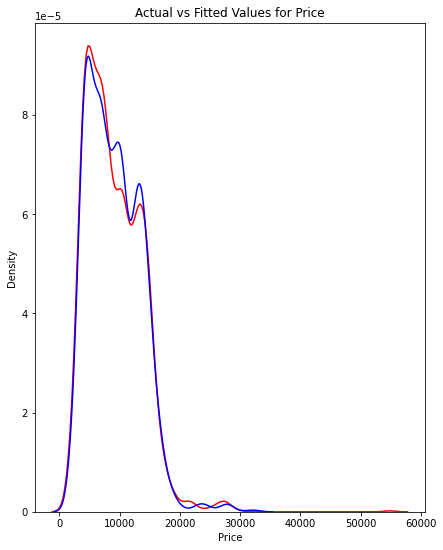

In [55]:
plt.figure(figsize=(7,9))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ans, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()

In [56]:
predict=Rf.predict(df_test.drop('Price',axis=1))

c:\Users\mayank\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [57]:
predict

array([13862.21 ,  6795.57 , 10981.745, ..., 13862.21 , 12776.47 ,
        9007.43 ])

In [58]:
import pickle
pickle.dump(Rf,open('model.pkl','wb'))